In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import koreanize_matplotlib

In [3]:
df=pd.read_csv('./brand_unit_sales_2023.csv')
df2=pd.read_csv('./brand_unit_sales_2_2023.csv')  
df.head()

,jngBizCrtraYr,brandMnno,jnghdqrtrsMnno,acntgYr,indutyLclasNm,indutyMlsfcNm,areaNm,frcsCnt,fyerAvrgSlsAmtScopeVal,arFyerAvrgSlsAmtScopeVal
0,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),서울,21.0,37000~41000,900~1100
1,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),부산,18.0,31000~35000,840~930
2,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),대구,1.0,0,0
3,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),인천,9.0,43000~48000,1100~1300
4,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),광주,26.0,32000~36000,850~950


In [4]:
df=pd.concat([df, df2], axis=0)
df.shape

(112759, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112759 entries, 0 to 51792
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   jngBizCrtraYr             112759 non-null  int64  
 1   brandMnno                 112759 non-null  object 
 2   jnghdqrtrsMnno            112759 non-null  object 
 3   acntgYr                   112759 non-null  int64  
 4   indutyLclasNm             112759 non-null  object 
 5   indutyMlsfcNm             112759 non-null  object 
 6   areaNm                    112759 non-null  object 
 7   frcsCnt                   107824 non-null  float64
 8   fyerAvrgSlsAmtScopeVal    101459 non-null  object 
 9   arFyerAvrgSlsAmtScopeVal  101428 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 9.5+ MB


In [6]:
df.isna().sum()

jngBizCrtraYr                   0
brandMnno                       0
jnghdqrtrsMnno                  0
acntgYr                         0
indutyLclasNm                   0
indutyMlsfcNm                   0
areaNm                          0
frcsCnt                      4935
fyerAvrgSlsAmtScopeVal      11300
arFyerAvrgSlsAmtScopeVal    11331
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True) 

In [8]:
df.shape

(101420, 10)

In [9]:

df = df.rename(columns={
"jngBizCrtraYr": "정보기준연도",
"brandMnno": "브랜드고유번호",
"jnghdqrtrsMnno": "본사고유번호",
"acntgYr": "회계기준연도",
"indutyLclasNm": "업종대분류",
"indutyMlsfcNm": "업종중분류",
"areaNm": "지역명",
"frcsCnt": "지역내가맹점수",
"fyerAvrgSlsAmtScopeVal": "연평균매출범위값",
"arFyerAvrgSlsAmtScopeVal": "단위면적당연평균매출범위값"
})

In [10]:
df.head()

,정보기준연도,브랜드고유번호,본사고유번호,회계기준연도,업종대분류,업종중분류,지역명,지역내가맹점수,연평균매출범위값,단위면적당연평균매출범위값
0,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),서울,21.0,37000~41000,900~1100
1,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),부산,18.0,31000~35000,840~930
2,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),대구,1.0,0,0
3,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),인천,9.0,43000~48000,1100~1300
4,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),광주,26.0,32000~36000,850~950


In [13]:
# 문자열 범위에서 평균 값 추출 함수
def extract_range_mean(s):
    if isinstance(s, str) and '~' in s:
        low, high = map(float, s.replace(',', '').split('~'))
        return (low + high) / 2
    return np.nan


# 적용
df['연평균매출'] = df['연평균매출범위값'].apply(extract_range_mean)
df['단위면적당연평균매출'] = df['단위면적당연평균매출범위값'].apply(extract_range_mean)


In [14]:
# 기본 통계 요약
print(df.describe())

# 지역별 평균 매출
print(df.groupby('지역명')['연평균매출'].mean())

# 지역별 단위면적당 매출
print(df.groupby('지역명')['단위면적당연평균매출'].mean())


         정보기준연도    회계기준연도        지역내가맹점수         연평균매출    단위면적당연평균매출
count  101420.0  101420.0  101420.000000  1.280000e+04  1.244600e+04
mean     2023.0    2022.0       5.862098  2.870686e+05  1.726550e+04
std         0.0       0.0     100.521528  3.436376e+05  5.650794e+05
min      2023.0    2022.0       0.000000  1.000000e+00  1.000000e+00
25%      2023.0    2022.0       0.000000  1.050000e+05  5.100000e+03
50%      2023.0    2022.0       0.000000  2.050000e+05  9.500000e+03
75%      2023.0    2022.0       1.000000  3.600000e+05  1.550000e+04
max      2023.0    2022.0   16615.000000  1.050000e+07  6.300000e+07
지역명
강원    237904.416910
경기    294316.833429
경남    226040.574273
경북    223882.185039
광주    296574.203125
대구    261500.199588
대전    287830.641791
부산    260869.007776
서울    358495.534586
세종    286642.118812
울산    249144.134483
인천    312471.638704
전남    238460.819718
전북    257373.894595
전체    304131.329023
제주    278460.380435
충남    251542.328482
충북    254508.833766
Name: 연평균매출, dt

In [15]:
# 서울 지역 데이터만 필터링
df_seoul = df[df['지역명'] == '서울'].copy()


In [16]:
def extract_range_mean(s):
    if isinstance(s, str) and '~' in s:
        low, high = map(float, s.replace(',', '').split('~'))
        return (low + high) / 2
    return np.nan

# 서울 데이터에 적용
df_seoul['연평균매출'] = df_seoul['연평균매출범위값'].apply(extract_range_mean)
df_seoul['단위면적당연평균매출'] = df_seoul['단위면적당연평균매출범위값'].apply(extract_range_mean)


In [17]:
# 기본 통계
print(df_seoul.describe())

# 업종별 평균 매출
print(df_seoul.groupby('업종중분류')['연평균매출'].mean().sort_values(ascending=False))

# 업종별 단위면적당 매출
print(df_seoul.groupby('업종중분류')['단위면적당연평균매출'].mean().sort_values(ascending=False))


       정보기준연도  회계기준연도      지역내가맹점수         연평균매출    단위면적당연평균매출
count  5678.0  5678.0  5678.000000  1.330000e+03  1.292000e+03
mean   2023.0  2022.0     8.884819  3.584955e+05  6.463814e+04
std       0.0     0.0    75.499033  3.885481e+05  1.752323e+06
min    2023.0  2022.0     0.000000  2.000000e+00  1.000000e+01
25%    2023.0  2022.0     0.000000  1.400000e+05  7.400000e+03
50%    2023.0  2022.0     1.000000  2.650000e+05  1.300000e+04
75%    2023.0  2022.0     5.000000  4.450000e+05  2.050000e+04
max    2023.0  2022.0  3056.000000  4.850000e+06  6.300000e+07
업종중분류
운송              1.623202e+06
종합소매점           1.015000e+06
중식              6.547917e+05
숙박              5.775000e+05
일식              5.279767e+05
(건강)식품          5.100000e+05
주점              4.883019e+05
부동산 중개          4.750000e+05
농수산물            4.700000e+05
서양식             4.538235e+05
기타도소매           4.179583e+05
한식              4.137124e+05
이미용             3.967333e+05
교육 (교과)         3.933680e+05
기타 외식           3.872

In [21]:
df_seoul.isna().sum()

정보기준연도              0
브랜드고유번호             0
본사고유번호              0
회계기준연도              0
업종대분류               0
업종중분류               0
지역명                 0
지역내가맹점수             0
연평균매출범위값            0
단위면적당연평균매출범위값       0
연평균매출            4348
단위면적당연평균매출       4386
dtype: int64

In [22]:
df_seoul.dropna(axis=0, inplace=True)       

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_1074/3795259546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_seoul, x='단위면적당연평균매출', y='업종중분류', ci=None)


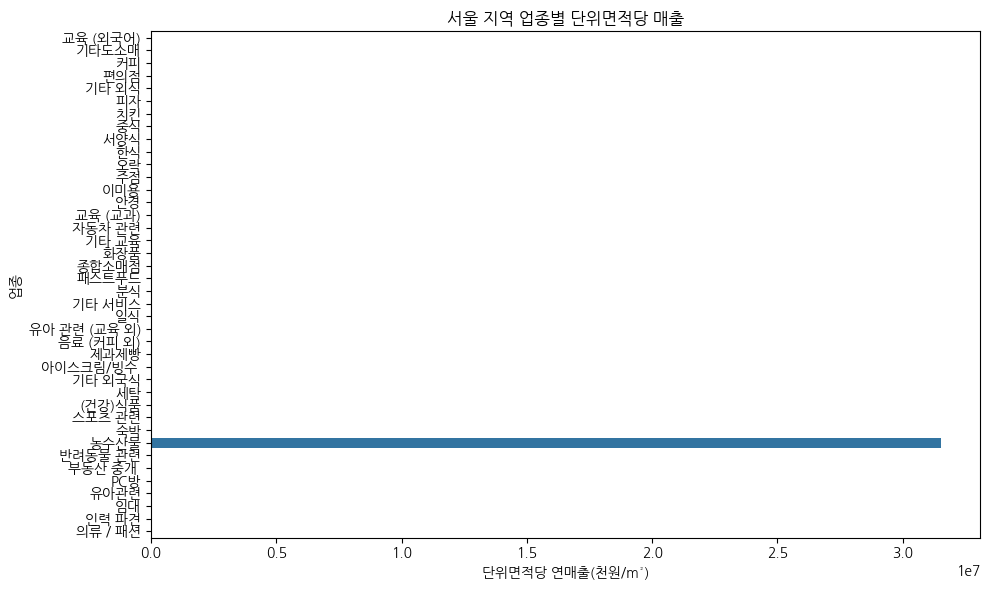

In [26]:
# 업종별 단위면적당 매출
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seoul, x='단위면적당연평균매출', y='업종중분류', ci=None)
plt.title('서울 지역 업종별 단위면적당 매출')
plt.xlabel('단위면적당 연매출(천원/m²)')
plt.ylabel('업종')
plt.tight_layout()
plt.show()


             지역내가맹점수     연평균매출  단위면적당연평균매출
지역내가맹점수     1.000000  0.038371    0.002436
연평균매출       0.038371  1.000000    0.032527
단위면적당연평균매출  0.002436  0.032527    1.000000


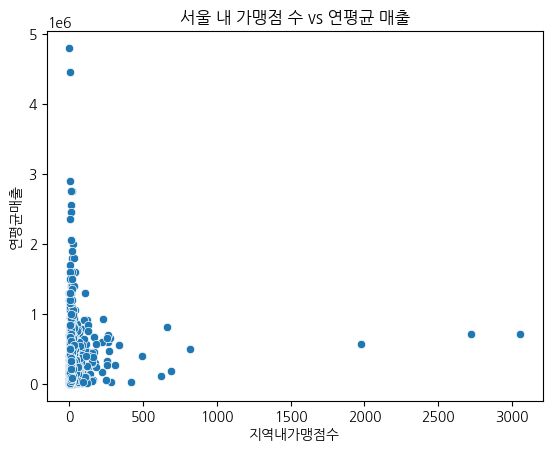

In [27]:
# 상관관계 분석
corr_seoul = df_seoul[['지역내가맹점수', '연평균매출', '단위면적당연평균매출']].corr()
print(corr_seoul)

# 산점도
sns.scatterplot(data=df_seoul, x='지역내가맹점수', y='연평균매출')
plt.title('서울 내 가맹점 수 vs 연평균 매출')
plt.show()
